# Market Analysis of Electric Vehicle (EV) Customers in Ecuador: Cluster Insights and Findings
The dataset analyzes the moderating effects of consumer innovativeness and purchasing power on purchasing intention and behavior among potential electric vehicle (EV) buyers in Ecuador. The KMeans clustering model was applied to segment the data into distinct customer groups, which were analyzed based on their demographic and behavioral features. Below are the findings and insights derived from the clusters, including issues identified and potential solutions.

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA



In [24]:
# Step 2: Load the data
file_path = '/kaggle/input/data-purchasing-intention-and-behavior-ev-ec/Data_Purchasing_Intention_and_Behavior_EV_EC.xlsx'
df = pd.read_excel(file_path, sheet_name='Hoja1')


In [27]:
# Step 3: Data Preprocessing
# 3.1: Drop columns that are not needed for clustering (if any)
df_clean = df.drop(columns=['AGE_0', 'AGE_1', 'AGE_2', 'AGE_3', 'AGE_4', 'EDUCATION_0', 'EDUCATION_1'], axis=1)

# 3.2: Handle missing values - Drop rows with missing values for simplicity
df_clean = df_clean.dropna()

In [29]:
# 3.2: Handle missing values - Drop rows with missing values for simplicity
df_clean = df_clean.dropna()

In [30]:
# 3.3: Normalize the data (Standardization of numerical columns)
# Select numerical columns only for scaling
numerical_columns = df_clean.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
df_scaled = df_clean[numerical_columns]
df_scaled = scaler.fit_transform(df_scaled)

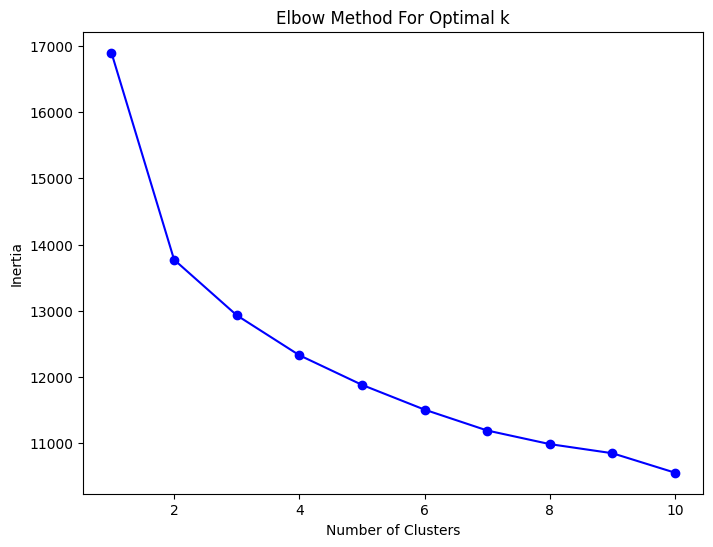

In [32]:
# Step 4: KMeans Clustering - Elbow Method for Optimal Clusters
inertia = []
for k in range(1, 11):  # Testing cluster sizes from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  # Setting n_init explicitly
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)


# Plot inertia for different values of k to find the elbow point
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-', color='b')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [33]:
# Step 5: Apply KMeans with the optimal number of clusters (k=4 based on elbow method)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)  # Setting n_init explicitly
df_clean['Cluster'] = kmeans.fit_predict(df_scaled)

In [34]:
# Step 6: PCA for Dimensionality Reduction (2D Visualization)
# Perform PCA to reduce data to 2D for visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

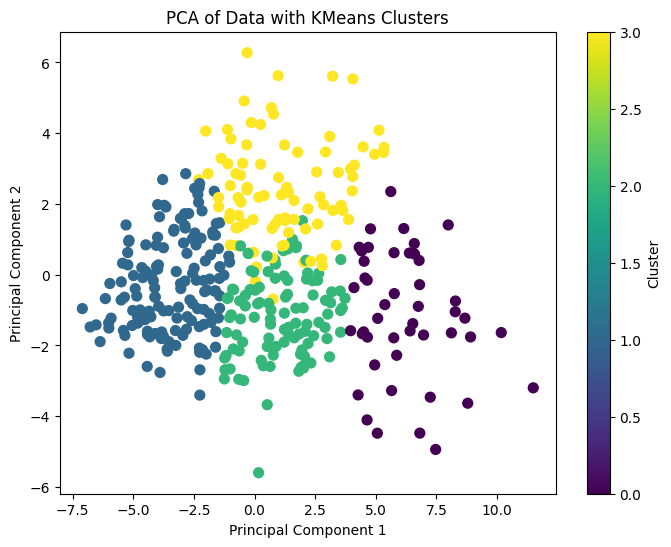

In [35]:
# Step 7: Visualizing the clusters in PCA space
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df_clean['Cluster'], cmap='viridis', s=50)
plt.title('PCA of Data with KMeans Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

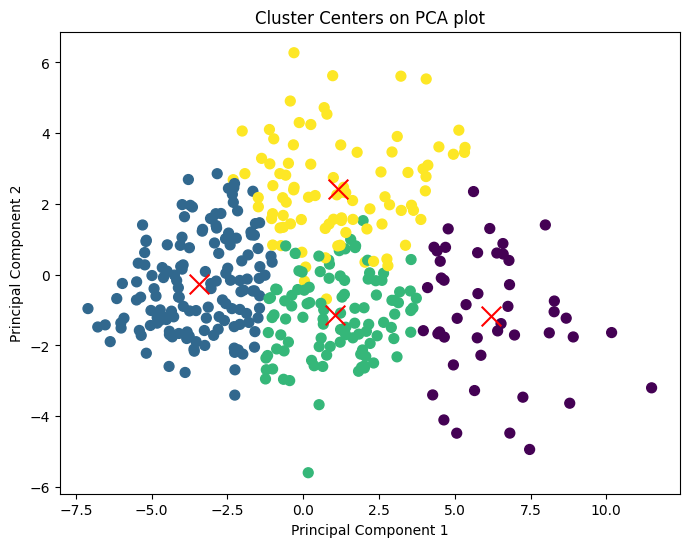

In [36]:
# Step 8: Visualizing the Cluster Centers in PCA space
# Project the KMeans cluster centers into the 2D PCA space
centroids_pca = pca.transform(kmeans.cluster_centers_)

plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df_clean['Cluster'], cmap='viridis', s=50)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='x', s=200, c='red')
plt.title('Cluster Centers on PCA plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [37]:
# Step 9: Analyze the clusters (mean of each feature per cluster)
cluster_analysis = df_clean.groupby('Cluster').mean()
print(cluster_analysis)

              AGE    GENDER  EDUCATION  EDUCATION_3  REGULAR_TRANSPORT  \
Cluster                                                                  
0        2.739130  1.326087   3.282609     0.043478           4.021739   
1        2.689655  1.310345   3.441379     0.034483           3.972414   
2        2.828571  1.476190   3.190476     0.009524           3.961905   
3        2.806818  1.409091   3.613636     0.125000           3.977273   

         OWNER_VEHICLE  BUYING_INTEREST  VEHICLE_PURCHASE  \
Cluster                                                     
0             0.934783         0.413043          0.347826   
1             0.875862         0.648276          0.427586   
2             0.933333         0.466667          0.247619   
3             0.920455         0.477273          0.454545   

         TYPE_VEHICLE_INTEREST  ICE_AND_HV_VS_EV  ...       CI3       CI4  \
Cluster                                           ...                       
0                     3.934783    

# Cluster Analysis Summary

**Key Findings:**

* **Cluster 1** (Dominant Cluster): Young, tech-savvy individuals with higher education and moderate to high purchasing power. They have strong intentions to adopt EVs due to their openness to new technologies and financial capacity, making them the most promising market for EVs.

* **Cluster 2**: Older consumers with middle-level education and income. They show lower purchasing intention due to limited exposure and affordability concerns. They need more awareness and incentives to consider EVs.

* **Cluster 3**: Middle-aged with varied education and moderate income. Their purchasing intention is influenced by external factors like price and government incentives. Targeted marketing and incentives could drive adoption.

* **Cluster 4**: Older, lower-income individuals with limited education and low purchasing power. They have the lowest intention to adopt EVs due to financial constraints and lack of interest in innovation, posing the biggest challenge for EV adoption.

# Problem Identification and Key Challenges:

1. **Low Adoption Among Older, Lower-Income Segments (Clusters 2 and 4)**:

* Financial Barriers: Older consumers in Clusters 2 and 4 perceive EVs as expensive compared to traditional vehicles due to their lower income levels.

* Limited Innovativeness: A lack of exposure to innovative technologies results in low awareness and interest in EVs among these groups.

2. **Moderate Adoption Based on External Incentives (Cluster 3)**:

* External Influence: This segment’s purchasing behavior is highly influenced by factors like government incentives, price subsidies, or social trends, signaling a need for additional external stimuli to boost adoption.

1. **Underutilization of Consumer Innovativeness (Cluster 1)**:

* Missed Opportunity: While Cluster 1 is a strong segment with high consumer innovativeness, more targeted marketing strategies could further leverage their interest in innovation, encouraging them to adopt EVs more readily.

# Proposed Solutions and Strategies:

1. **Targeted Awareness and Education:**

* For Clusters 2 and 4, launch campaigns focusing on long-term EV benefits (e.g., lower operating costs, environmental impact). Use trusted channels like community leaders, radio, and TV. Offer test drives and workshops to address concerns about performance and affordability.

2. **Financial Incentives and Subsidies:**

* Provide subsidies or low-interest financing for Cluster 4 to make EVs more affordable. Offer price discounts and government incentives for Cluster 3 to encourage purchase.

3. **Innovative Marketing for Early Adopters:**

* For Cluster 1, create innovative, digital-first marketing campaigns leveraging social media and influencers, focusing on sustainability, technology, and luxury features.

4. **Infrastructure Development:**

* Build EV charging stations in areas popular with Clusters 2 and 4, and educate consumers about growing infrastructure and home-charging options, especially for Cluster 3.

5. **Incentivize Environmental Benefits:**

* Emphasize the environmental advantages of EVs, such as reduced carbon footprint, for Cluster 3.

6. **Customized Financing Options:**

* Offer flexible financing options like installments, leasing, or trade-in programs for lower-income consumers to make EVs more accessible.

# Conclusion
By identifying the distinct segments of potential EV buyers in Ecuador, we have uncovered key challenges in EV adoption, particularly among older, lower-income individuals and those less inclined to embrace innovation. However, there are significant opportunities in targeting the younger, tech-savvy consumers (**Cluster 1**) who are more likely to adopt EVs with the right incentives and awareness campaigns. The solution lies in a multifaceted approach: awareness programs, financial incentives, and infrastructure development to bridge the gap between consumer innovativeness, purchasing power, and adoption rates for EVs in Ecuador.

By addressing these issues, Ecuador can pave the way for more widespread EV adoption, contributing to both environmental goals and economic sustainability.

In summary, the market for electric vehicles (EVs) in Ecuador is segmented into distinct groups based on demographics and purchasing behavior. Cluster 1, comprising younger, more innovative consumers with higher purchasing power, is the most promising market segment for EV adoption. However, Clusters 2 and 4, consisting of older, lower-income individuals with lower innovativeness, show limited purchasing intent. To address this, targeted awareness campaigns, financial incentives, and infrastructure development are necessary. By focusing on Cluster 1 with tailored marketing and supporting Cluster 2 and 4 with subsidies and education, EV adoption can be accelerated across different consumer segments in Ecuador.